Nombre: Santillan Jason

Clases:
1. Candado
2. Taza de Cafe
3. Pelota de Futbol

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ------------------------------------------------------------------------


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# ------------------------------------------------------------------------


In [ ]:
from ultralytics import settings

# Update a setting
settings.update({'runs_dir': '/content/drive/MyDrive/Datasets/YOLO/train'})

In [ ]:
# Ruta al directorio del conjunto de datos en Google Drive
dataset_path = '/content/drive/MyDrive/Datasets/YOLO'

# Entrenar desde cero (sin checkpoint)
!yolo task=detect mode=train model=yolov8n-seg.pt data={dataset_path}/data.yaml epochs=40 imgsz=640 plots=True save_period=1

# ------------------------------------------------

#
# checkpoint_path = '/content/drive/MyDrive/Datasets/YOLO/train/segment/train3/weights/last.pt'

# !yolo task=detect mode=train resume model={checkpoint_path} data={dataset_path}/data.yaml epochs=40 imgsz=640 plots=True save_period=1


WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/drive/MyDrive/Datasets/YOLO/train/segment/train3/weights/last.pt, data=/content/drive/MyDrive/Datasets/YOLO/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train32, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=Fa

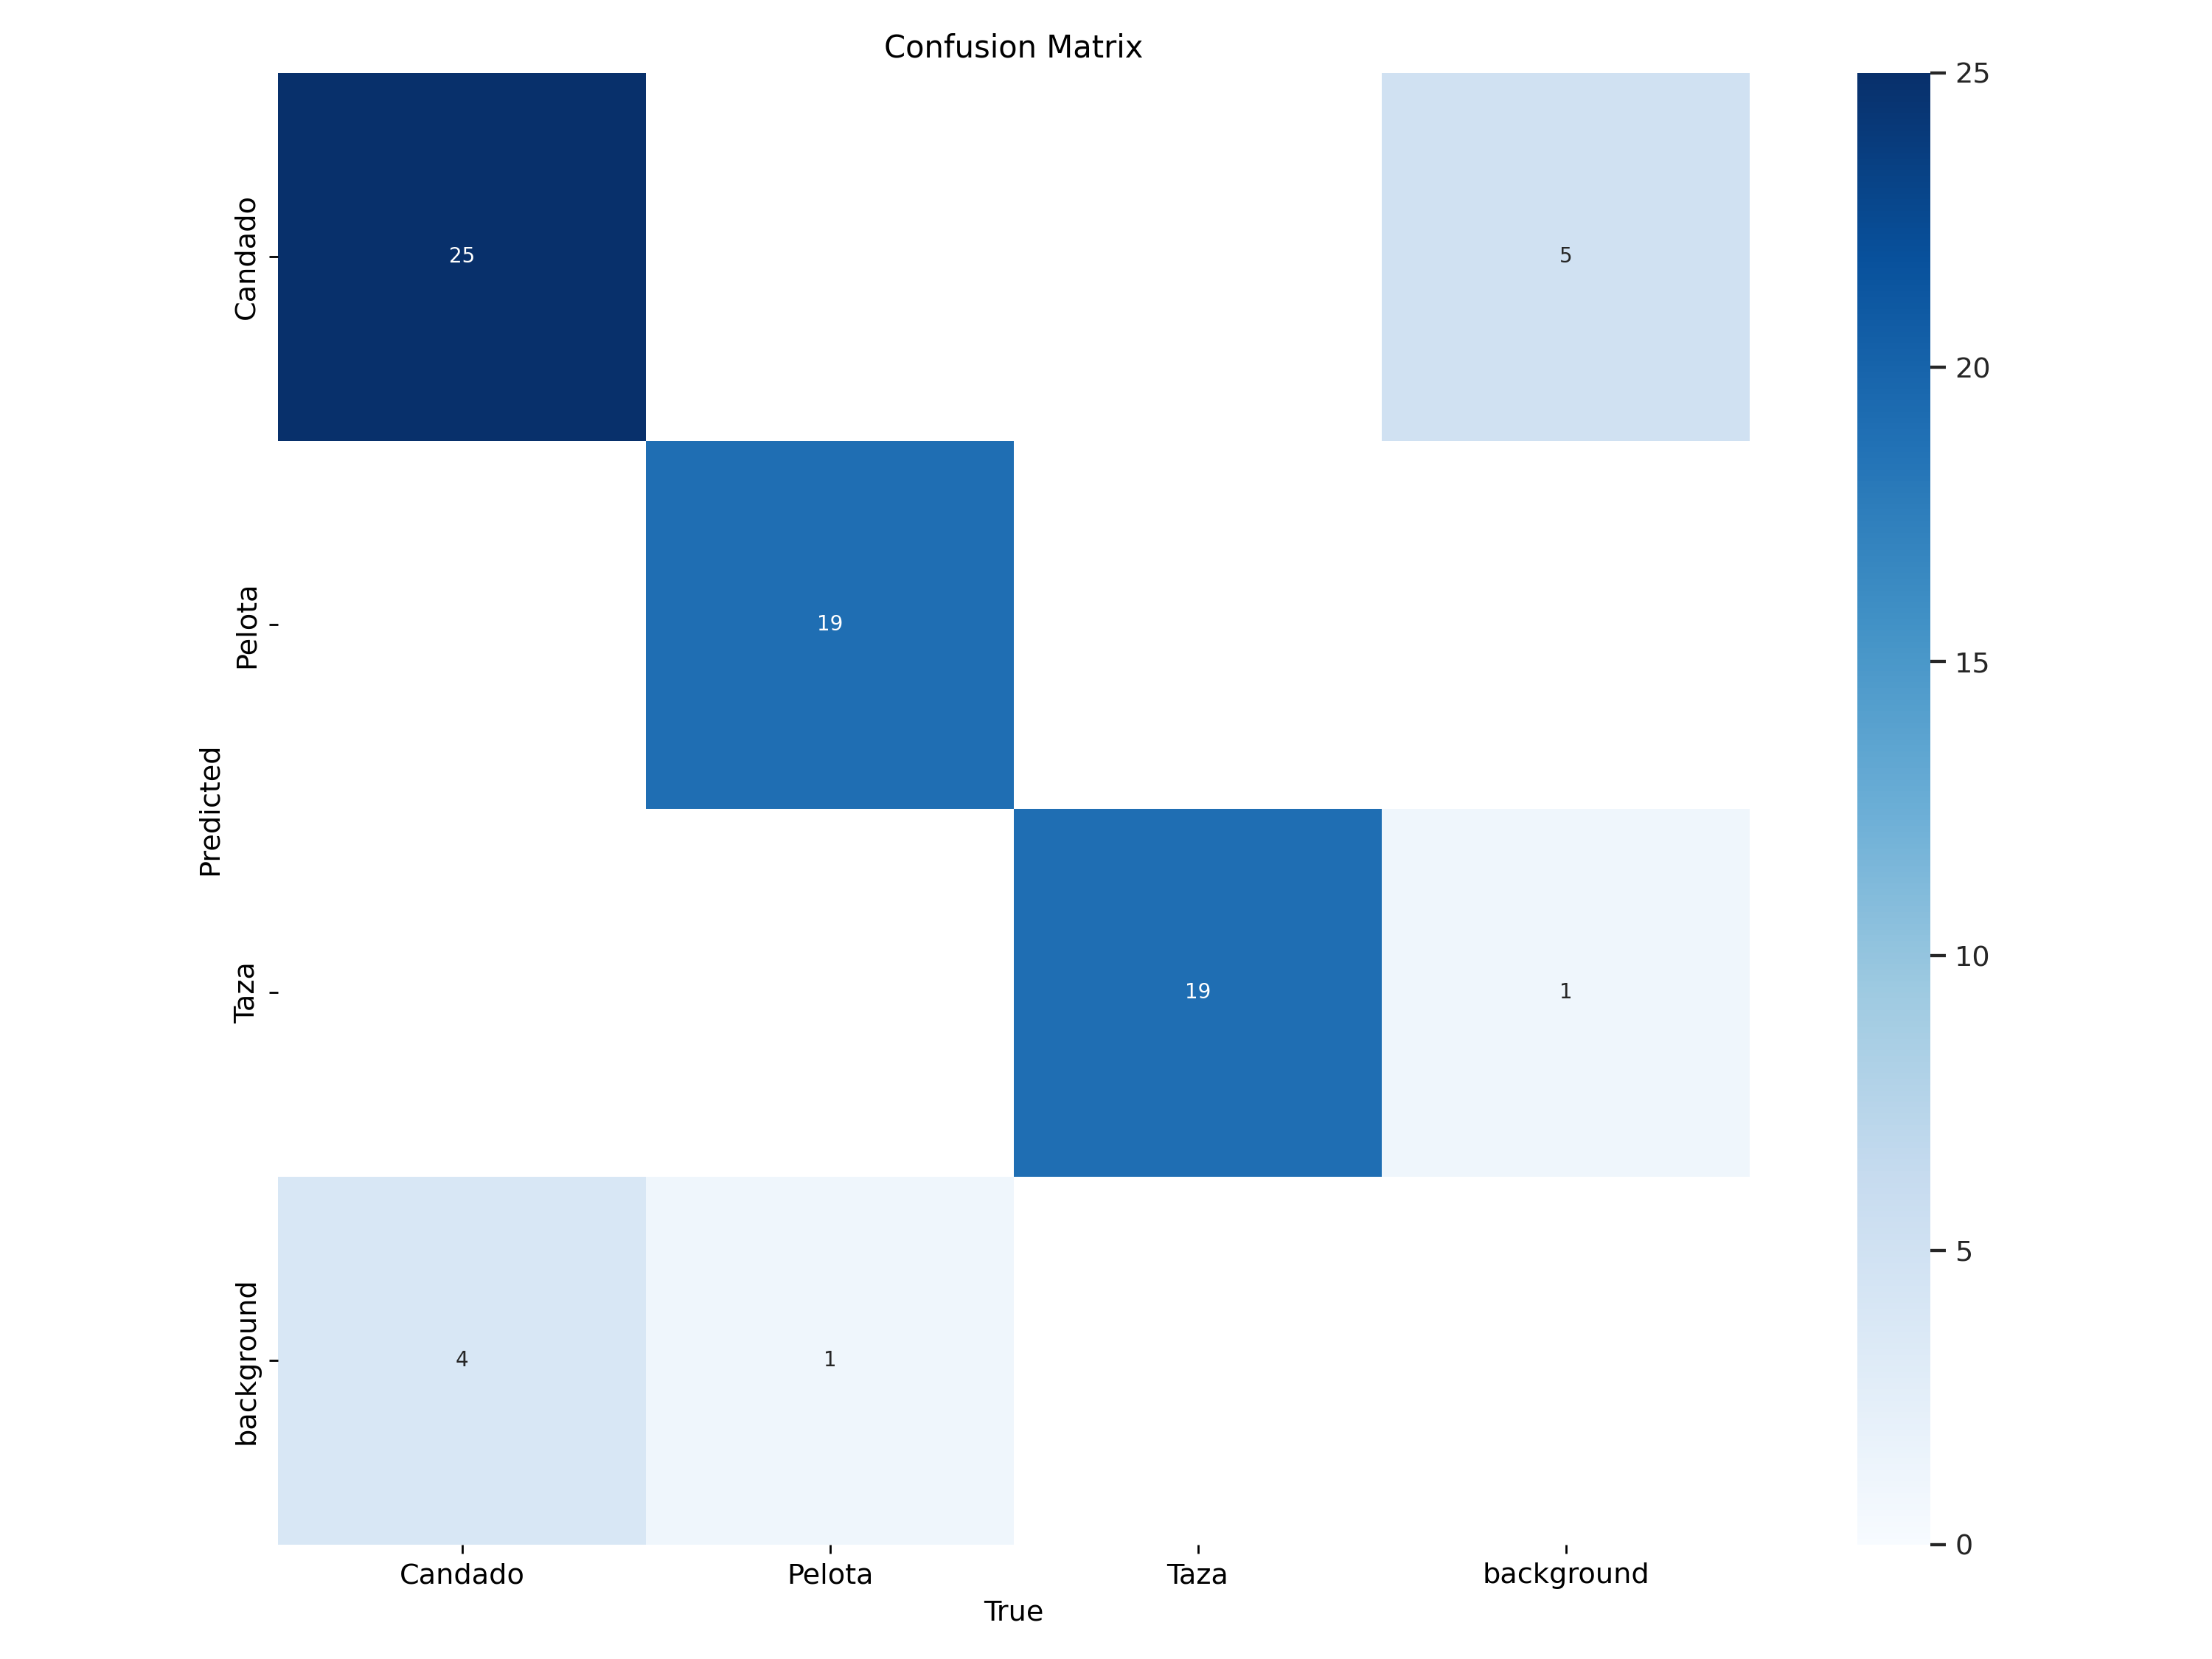

In [ ]:
Image(filename='/content/drive/MyDrive/Datasets/YOLO/train/segment/train3/confusion_matrix.png', width=600)

# ------------------------------------------------------------------------


In [ ]:
!ls /content/drive/MyDrive/Datasets/YOLO/train/segment/train3

args.yaml					     labels.jpg		  train_batch1201.jpg
BoxF1_curve.png					     MaskF1_curve.png	  train_batch1202.jpg
BoxP_curve.png					     MaskP_curve.png	  train_batch1.jpg
BoxPR_curve.png					     MaskPR_curve.png	  train_batch2.jpg
BoxR_curve.png					     MaskR_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1699573498.8f92f6beb659.12338.0  train_batch0.jpg	  val_batch1_pred.jpg
labels_correlogram.jpg				     train_batch1200.jpg  weights


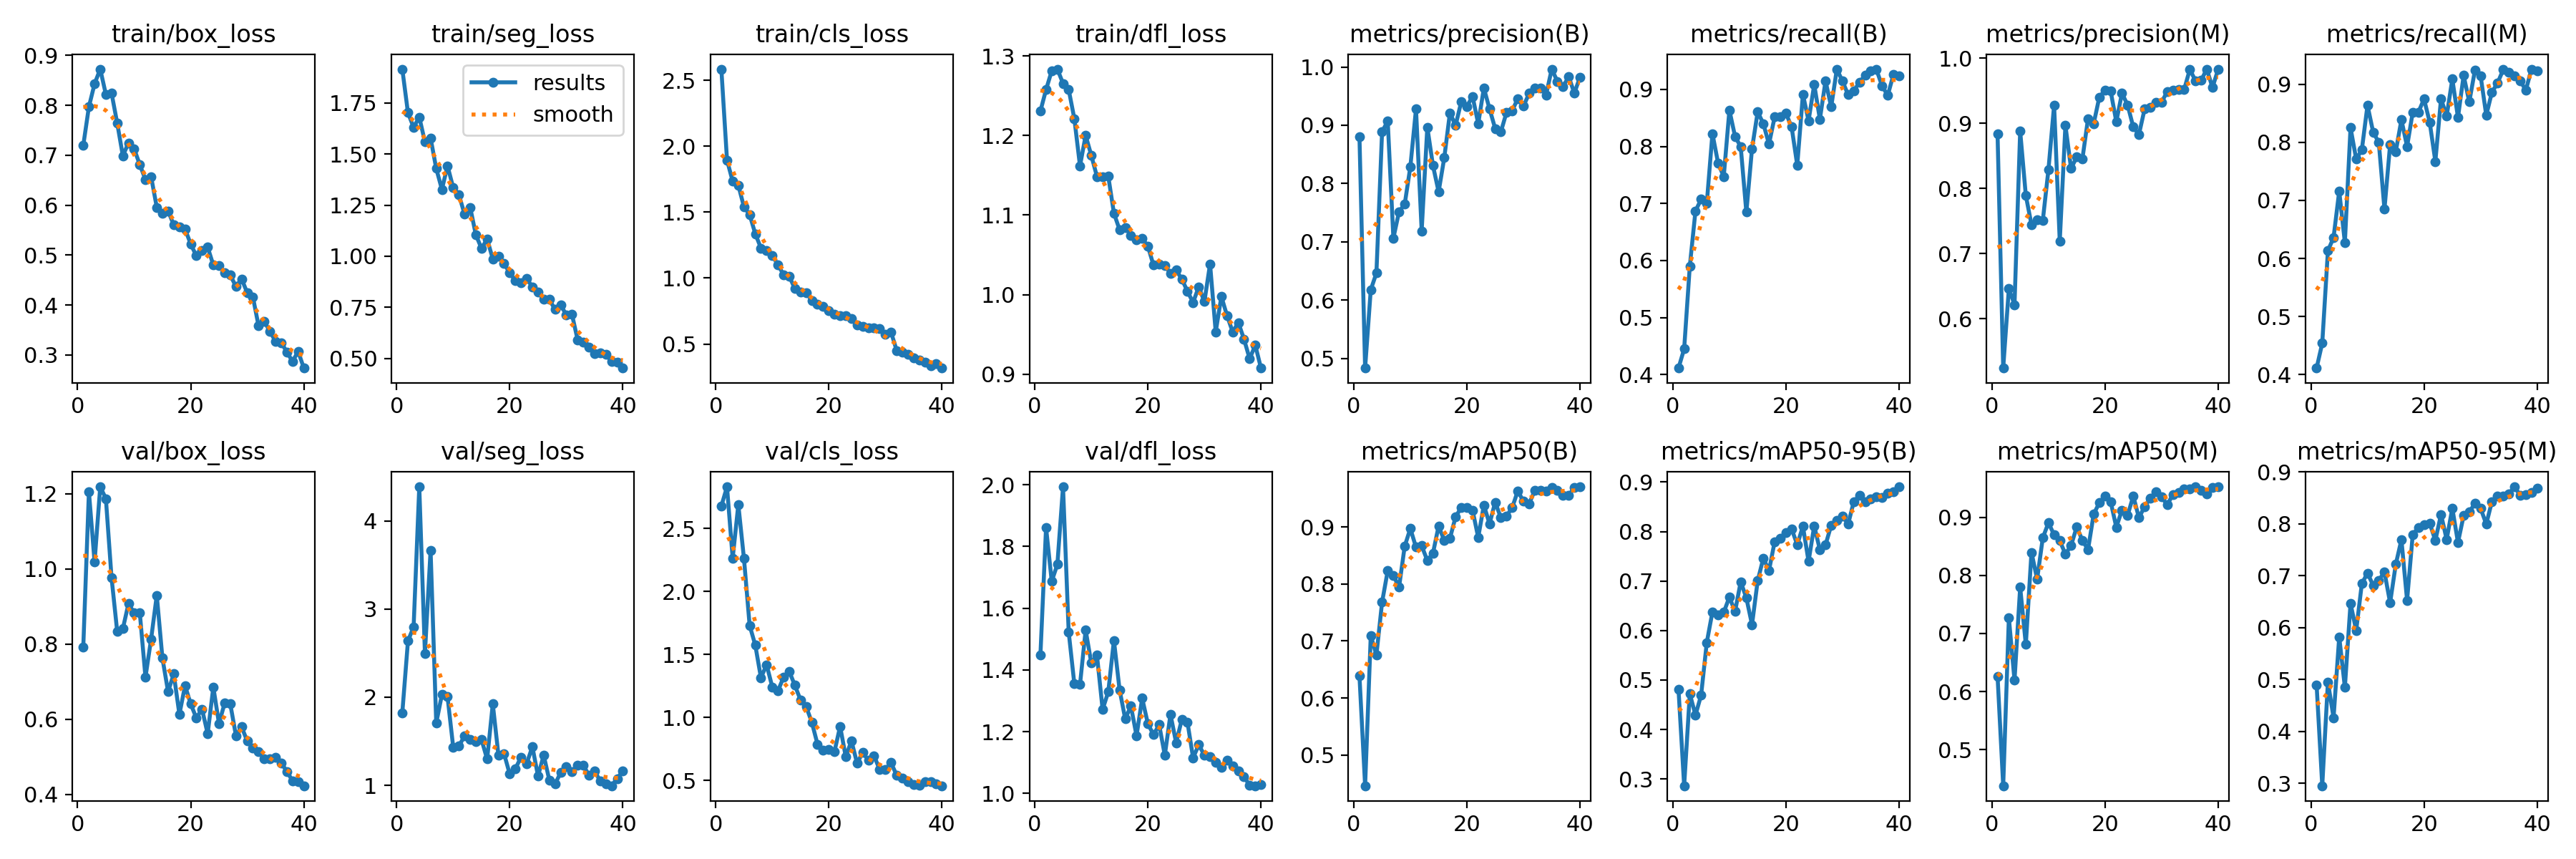

In [ ]:
Image(filename='/content/drive/MyDrive/Datasets/YOLO/train/segment/train3/results.png', width=800)

# ------------------------------------------------------------------------


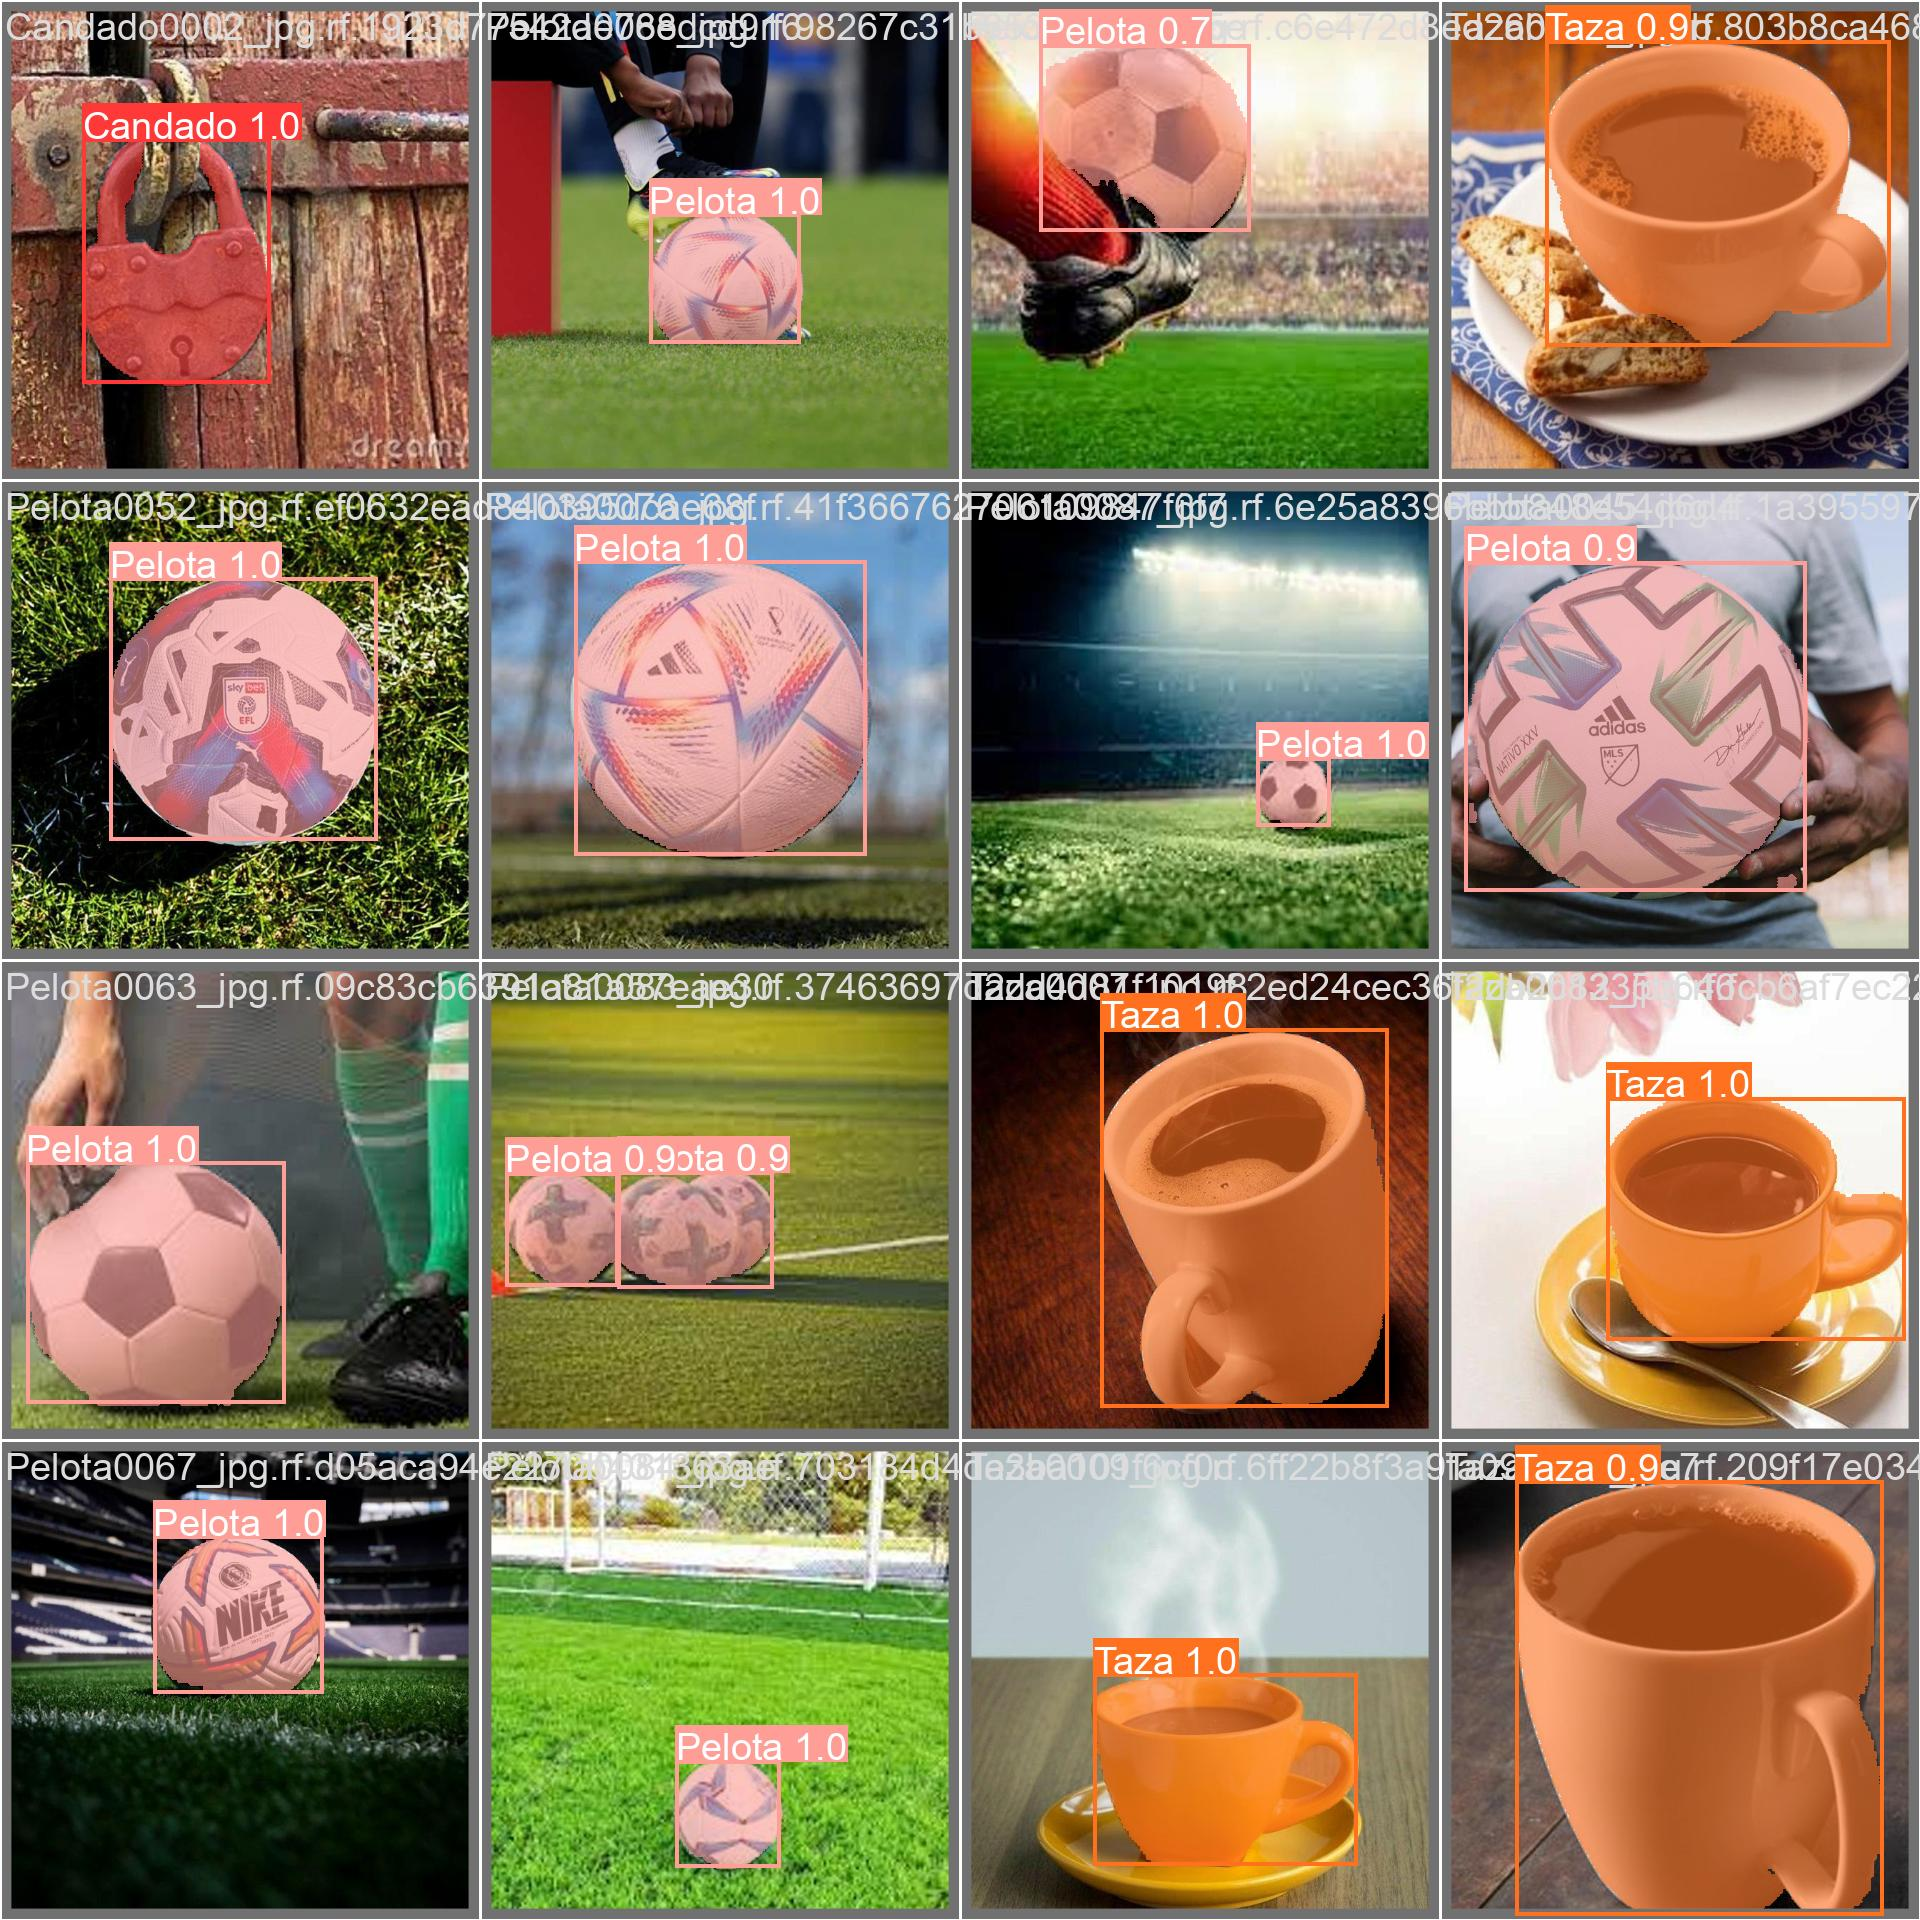

In [ ]:
Image(filename='/content/drive/MyDrive/Datasets/YOLO/train/segment/train3/val_batch0_pred.jpg', width=600)

In [ ]:
# Ruta al directorio del conjunto de datos en Google Drive
dataset_path = '/content/drive/MyDrive/Datasets/YOLO'

# Ruta del checkpoint para la validación
checkpoint_path_val = '/content/drive/MyDrive/Datasets/YOLO/train/segment/train3/weights/best.pt'

!yolo task=detect mode=val resume model={checkpoint_path_val} data={dataset_path}/data.yaml

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258649 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/Datasets/YOLO/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100% 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.43s/it]
                   all         60         68      0.983      0.924      0.971      0.893      0.983      0.924      0.953      0.868
               Candado         60         29      0.953      0.828      0.945      0.793      0.953      0.828      0.914      0.735
                Pelota         60         20      0.996       0.95      0.972      0.907      0.996       0.95   

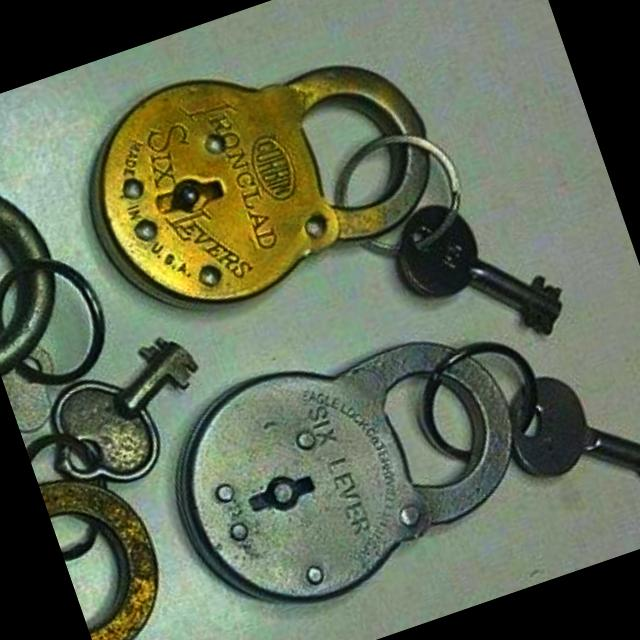

In [ ]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
img_name='Candado0001_jpg.rf.02f1d9feb062f1499c1a1b2d56ec91aa'
img =cv2.imread(f"/content/drive/MyDrive/Datasets/YOLO/train/images/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/Datasets/YOLO/train/images/{img_name}.jpg", width=600)

# ------------------------------------------------------------------------



In [ ]:
model= YOLO("/content/drive/MyDrive/Datasets/YOLO/train/segment/train3/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)

# ------------------------------------------------------------------------




0: 640x640 2 Candados, 11.3ms
Speed: 3.9ms preprocess, 11.3ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


True

In [ ]:
%cd /content/drive/MyDrive/Datasets/YOLO
!ls

# ------------------------------------------------------------------------


/content/drive/MyDrive/Datasets/YOLO
data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


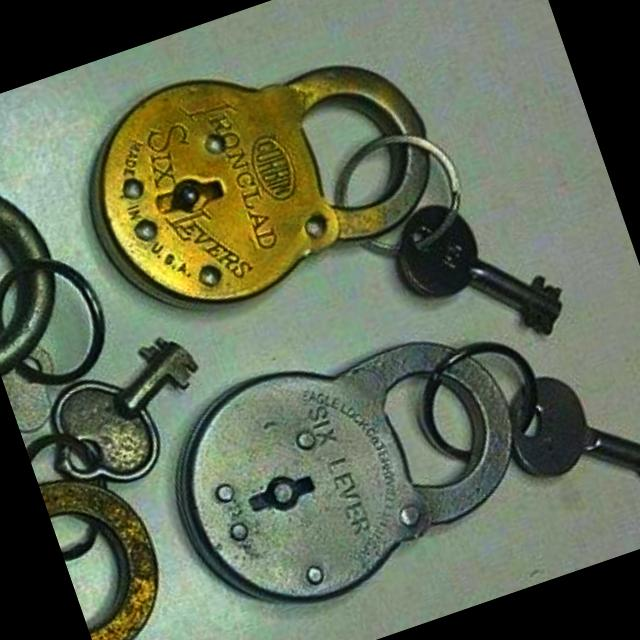

In [ ]:
Image(filename=f"/content/drive/MyDrive/Datasets/YOLO/train/images/{img_name}.jpg", width=640)

# ------------------------------------------------------------------------

